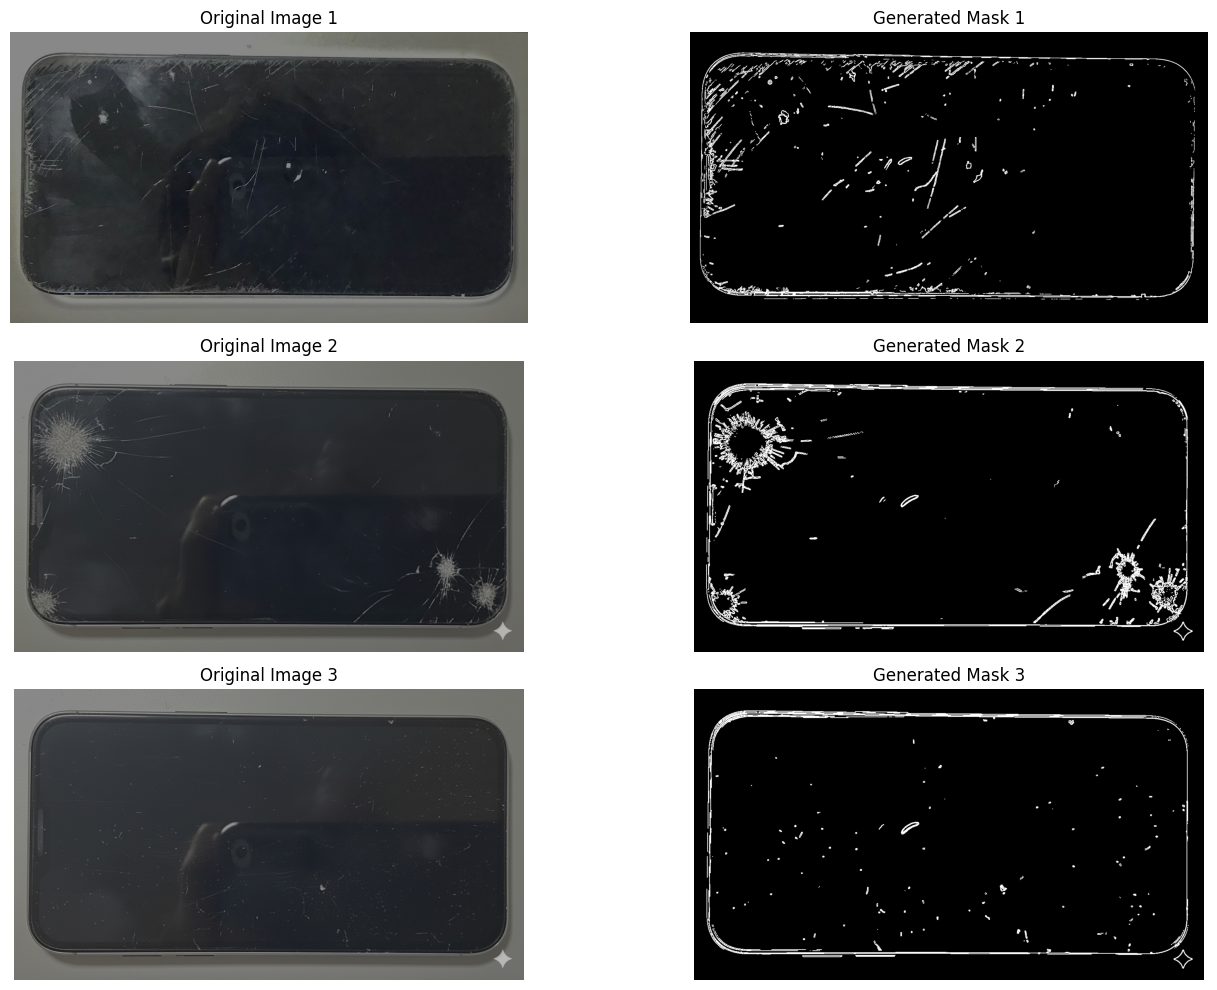

In [8]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

base_path = "/Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/smartphone_defect_segmentation/data/Mobile Phone Defect"
base_data_path = f"{base_path}/real"
sample_image_paths = glob.glob(f"{base_data_path}/*.jpeg") + glob.glob(f"{base_data_path}/*.png") + glob.glob(f"{base_data_path}/*.jpg")

# 시각화할 이미지 개수 설정 (예: 상위 3장)
num_samples = min(3, len(sample_image_paths))
plt.figure(figsize=(15, 10))

for i in range(num_samples):
    # 1. 이미지 로드 및 그레이스케일 변환
    img = cv2.imread(sample_image_paths[i])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. 노이즈 제거 (잔기스를 보존하면서 배경 노이즈 억제)
    denoised = cv2.fastNlMeansDenoising(gray, h=7)

    # 3. 엣지 강조 (Sobel 연산)
    grad_x = cv2.Sobel(denoised, cv2.CV_16S, 1, 0, ksize=3)
    grad_y = cv2.Sobel(denoised, cv2.CV_16S, 0, 1, ksize=3)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    edge = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    # 4. 이진화 (Threshold 수치는 이미지 밝기에 따라 20~50 사이 조절 권장)
    _, mask = cv2.threshold(edge, 35, 255, cv2.THRESH_BINARY)
    
    # 5. 마스크 정제 (작은 점 노이즈 제거 및 선 연결)
    kernel = np.ones((2,2), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) # 노이즈 제거

    # 6. Matplotlib 시각화
    # 원본 이미지
    plt.subplot(num_samples, 2, 2*i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    # 추출된 Mask
    plt.subplot(num_samples, 2, 2*i + 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Generated Mask {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
from PIL import Image
import os
import glob

base_path = "/Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/smartphone_defect_segmentation/data/Mobile Phone Defect"
base_data_path = f"{base_path}/real"
sample_image_paths = glob.glob(f"{base_data_path}/*.jpeg") + glob.glob(f"{base_data_path}/*.png") + glob.glob(f"{base_data_path}/*.jpg")

# 이미지 정보 수집
image_info = []

for img_path in sample_image_paths:
    img = Image.open(img_path)
    width, height = img.size
    file_size = os.path.getsize(img_path) / 1024  # KB 단위

    image_info.append({
        'file_name': os.path.basename(img_path),
        'width': width,
        'height': height,
        'size (KB)': round(file_size, 2),
        'aspect_ratio': round(width/height, 2)
    })

# DataFrame 생성
df = pd.DataFrame(image_info)
df

,file_name,width,height,size (KB),aspect_ratio
0,real_scratch_1.jpeg,1774,997,214.67,1.78
1,real_scratch_3.png,1344,768,1201.27,1.75
2,real_scratch_2.png,1344,768,1246.90,1.75
